In [1]:
import warnings

# Suppress sklearn deprecation warning for 'multi_class' in LogisticRegression
warnings.filterwarnings(
    "ignore",
    message=".*'multi_class' was deprecated.*",
    category=FutureWarning,
)



<h1 style='background-color:transparent; border: 3px solid rgb(12, 81, 156); padding:20px; font-size:32px; font-family: consolas; text-align:center; border-radius:15px; color:rgb(12, 81, 156);'><b>Football Match Outcome Prediction</b></h1>

<h2 style='background-color:#0c519c; color:white; padding:10px; font-size:24px; font-family: consolas; text-align:center; border-radius:10px;'>Table of Contents</h2>

- [Introduction](#Introduction)
- [Data Loading and Preparation](#Data-Loading-and-Preparation)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Creating New Variables](#Creating-New-Variables)
   - [Possession Ratio](#Possession-Ratio)
   - [Goals per Game](#Goals-per-Game)
   - [Shots on Target Ratio](#Shots-on-Target-Ratio)
   - [Passing Accuracy](#Passing-Accuracy)
   - [Number of Fouls per Game](#Number-of-Fouls-per-Game)
   - [Yellow Card Ratio](#Yellow-Card-Ratio)
   - [Red Card Ratio](#Red-Card-Ratio)
   - [Home Advantage](#Home-Advantage)
   - [Winning Ratio](#Winning-Ratio)
- [Predicting Match Outcomes Using Machine Learning](#Predicting-Match-Outcomes-Using-Machine-Learning)
   - [Data Preprocessing](#Data-Preprocessing)
   - [Decision Trees](#Decision-Trees)
   - [Random Forest](#Random-Forest)
   - [Support Vector Machines](#Support-Vector-Machines)
   - [Naive Bayes](#Naive-Bayes)
   - [K-Nearest Neighbors](#K-Nearest-Neighbors)
   - [Model Comparison and Diagnostics](#Model-Comparison-and-Diagnostics)
- [Conclusion](#Conclusion)

<h2 style='background-color:#0c519c; color:white; padding:10px; font-size:24px; font-family: consolas; text-border-radius:10px;'>Data Loading and Preparation</h2>

I will start by loading the dataset using pandas library and preparing it for analysis. I will begin by importing the required libraries and loading the dataset into a pandas DataFrame.

In [2]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/datasets/football-datasets/master/datasets/la-liga/season-1112.csv"
df = pd.read_csv(url)

# View the first 5 rows of the dataset
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,27/08/11,Granada,Betis,0,1,A,0,0,D,NaN,...,2,3,12,16,8,5,2,2,0,0
1,27/08/11,Sp Gijon,Sociedad,1,2,A,0,1,A,NaN,...,4,2,14,11,9,2,2,1,1,1
2,27/08/11,Valencia,Santander,4,3,H,1,2,A,NaN,...,11,3,14,11,10,3,3,3,0,0
3,28/08/11,Ath Bilbao,Vallecano,1,1,D,0,0,D,NaN,...,4,6,17,19,9,4,1,3,0,0
4,28/08/11,Ath Madrid,Osasuna,0,0,D,0,0,D,NaN,...,8,2,9,8,12,5,1,0,0,0


Next, I will check the size and shape of the dataset to get an idea of the number of rows and columns.

In [3]:
# Check the size of the dataset
print("The dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The dataset has 380 rows and 22 columns


This will print the number of rows and columns in the dataset.

I will then check for missing values in the dataset.

In [4]:
# Check for missing values in the dataset
print("The dataset has {} missing values".format(df.isnull().sum().sum()))

The dataset has 380 missing values


This will print the total number of missing values in the dataset. In case there are missing values, we will need to handle them appropriately.

Finally, I will check the data types of the columns.

In [5]:
# Check the data types of the columns
print(df.dtypes)

Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG          int64
HTAG          int64
HTR          object
Referee     float64
HS            int64
AS            int64
HST           int64
AST           int64
HF            int64
AF            int64
HC            int64
AC            int64
HY            int64
AY            int64
HR            int64
AR            int64
dtype: object


This will print the data types of all the columns in the dataset. We can use this information to convert columns to the appropriate data types for analysis.

<h2 style="background-color:#0c519c; color:white; padding:10px; font-size:24px; font-family: consolas; border-radius:10px;">Exploratory Data Analysis</h2>

After preparing the data, I will perform exploratory data analysis (EDA) to gain insights into the dataset.

<h3 style="background-color:#0c519c; color:white; padding:10px; font-size:24px; font-family: consolas; border-radius:10px;">Summary Statistics</h3>

To start with, I will calculate some summary statistics for the dataset using the describe method.

In [6]:
# Calculate summary statistics for numerical columns
print(df.describe())

             FTHG        FTAG        HTHG        HTAG  Referee          HS  \
count  380.000000  380.000000  380.000000  380.000000      0.0  380.000000   
mean     1.678947    1.084211    0.723684    0.457895      NaN   14.615789   
std      1.457246    1.136241    0.877732    0.666433      NaN    5.498358   
min      0.000000    0.000000    0.000000    0.000000      NaN    1.000000   
25%      1.000000    0.000000    0.000000    0.000000      NaN   11.000000   
50%      1.000000    1.000000    1.000000    0.000000      NaN   14.000000   
75%      2.000000    2.000000    1.000000    1.000000      NaN   18.000000   
max      8.000000    7.000000    5.000000    4.000000      NaN   35.000000   

               AS         HST         AST          HF          AF          HC  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean    11.368421    5.336842    4.005263   14.892105   14.492105    6.247368   
std      4.742560    2.868666    2.365088    4.611153 

This will print the count, mean, standard deviation, minimum, 25%, 50%, 75%, and maximum values for all numerical columns in the dataset.

<h3 style="background-color:#0c519c; color:white; padding:10px; font-size:24px; font-family: consolas; border-radius:10px;">Distribution of Target Variable</h3>

The target variable in this dataset is the full-time result (FTR), which indicates whether the home team won, lost or drew the match. I will plot a histogram of the target variable to check its distribution.

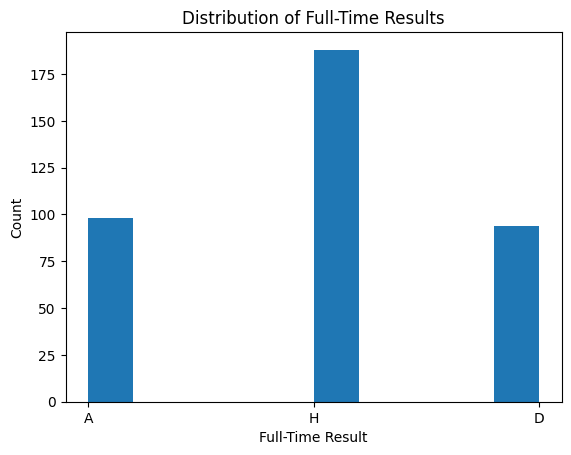

In [7]:
import matplotlib.pyplot as plt

# Plot a histogram of the full-time result variable
plt.hist(df['FTR'])
plt.title('Distribution of Full-Time Results')
plt.xlabel('Full-Time Result')
plt.ylabel('Count')
plt.show()

This will display a histogram of the target variable showing the count of each category (home win, away win, and draw).

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Home and Away Team Analysis</h3>

I will now analyze the performance of home and away teams in the dataset. I will start by calculating the total number of home wins, away wins, and draws in the dataset.

In [8]:
# Calculate the number of home wins, away wins, and draws
home_wins = len(df[df['FTR'] == 'H'])
away_wins = len(df[df['FTR'] == 'A'])
draws = len(df[df['FTR'] == 'D'])

# Print the results
print("Total number of home wins: {}".format(home_wins))
print("Total number of away wins: {}".format(away_wins))
print("Total number of draws: {}".format(draws))

Total number of home wins: 188
Total number of away wins: 98
Total number of draws: 94


This will print the total number of home wins, away wins, and draws in the dataset.

Next, I will calculate the average number of goals scored by home and away teams.

In [9]:
# Calculate the average number of goals scored by home and away teams
avg_home_goals = df['FTHG'].mean()
avg_away_goals = df['FTAG'].mean()

# Print the results
print("Average number of goals scored by home teams: {:.2f}".format(avg_home_goals))
print("Average number of goals scored by away teams: {:.2f}".format(avg_away_goals))

Average number of goals scored by home teams: 1.68
Average number of goals scored by away teams: 1.08


This will print the average number of goals scored by home and away teams.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Correlation Analysis</h3>

I will now perform correlation analysis to identify the relationship between different variables in the dataset. I will start by calculating the correlation matrix for all numerical variables.

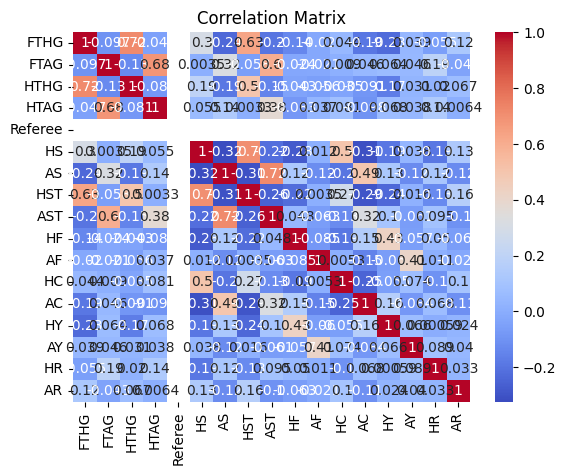

In [10]:
# Calculate the correlation matrix (numeric columns only)
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
import seaborn as sns
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

This will display a heatmap showing the correlation between all numerical variables in the dataset.

<h2 style="background-color:#0c519c; color:white; padding:10px; font-size:24px; font-family: consolas; border-radius:10px;">Creating New Variables</h2>

We will create several new variables that could potentially provide valuable insights into team performance.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Possession Ratio</h3>

Possession ratio is the percentage of time a team has possession of the ball during a match. It's an important measure of a team's attacking prowess and ability to control the game. We will create a new variable called possession_ratio that represents the possession ratio for each match.

To create the possession_ratio variable, we need to first calculate the total number of shots taken by each team in a match. We can do this by adding up the HS (home team shots) and AS (away team shots) columns. We can then calculate the possession ratio as the percentage of total shots taken by the home team.

In [11]:
df['total_shots'] = df['HS'] + df['AS']
df['possession_ratio'] = df['HS'] / df['total_shots'] * 100

## Goals Per Game

Possession is an important aspect of football and can often be an indicator of which team is in control of the game. To calculate the possession ratio, we need to divide the total time each team had possession by the total time of the game.

In this dataset, we can approximate the possession ratio by using the number of shots taken by each team. The possession ratio can be calculated as follows:

$$ \text{Possession Ratio} = \frac{\text{Total Shots By Home Team}}{\text{Total Shots By Home Team + Total Shots By Away Team}} $$

We can create a new column Possession Ratio in our dataset to store the calculated values. Here's the code to create this new variable:

In [12]:
# Creating Possession Ratio variable
df['Possession Ratio'] = round(df['HS'] / (df['HS'] + df['AS']), 3)

We have rounded the values to 3 decimal places to make them easier to read. Now, let's take a look at the top 10 rows of the dataset with the newly created Possession Ratio variable.

In [13]:
# Display top 10 rows of the dataset with the Possession Ratio variable
df[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'Possession Ratio']].head(10)

,HomeTeam,AwayTeam,FTHG,FTAG,Possession Ratio
0,Granada,Betis,0,1,0.379
1,Sp Gijon,Sociedad,1,2,0.739
2,Valencia,Santander,4,3,0.867
3,Ath Bilbao,Vallecano,1,1,0.435
4,Ath Madrid,Osasuna,0,0,0.636
5,Getafe,Levante,1,1,0.471
6,Mallorca,Espanol,1,0,0.550
7,Sevilla,Malaga,2,1,0.714
8,Zaragoza,Real Madrid,0,6,0.170
9,Barcelona,Villarreal,5,0,0.783


As we can see, the Possession Ratio variable has been successfully created and added to the dataset. We can now use this variable to analyze the possession statistics of different teams in La Liga.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Possession Ratio</h3>

To calculate the goals per game, we can simply divide the total number of goals by the total number of matches played.

Let's create a new column called GPG which represents the average number of goals per game.

In [14]:
df['GPG'] = (df['FTHG'] + df['FTAG']) / 2

Now, let's plot the distribution of the GPG variable using a histogram.

In [15]:
import plotly.express as px

fig = px.histogram(df, x='GPG', nbins=20, opacity=0.7, title='Distribution of Goals per Game')
fig.show()

The resulting plot shows us the distribution of goals per game, with most matches having between 2 and 3 goals per game.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Shots on Target Ratio</h3>

Shots on target ratio is an important metric to evaluate the effectiveness of a team's offense. We can calculate the shots on target ratio by dividing the number of shots on target by the total number of shots.

In [16]:
df['SOTR'] = df['HST'] / df['HS']

Now, let's create a box plot to visualize the distribution of shots on target ratio for each team.

In [17]:
import plotly.express as px

fig = px.box(df, x='HomeTeam', y='SOTR', color='HomeTeam', title='Shots on Target Ratio Distribution by Home Team')
fig.show()

As we can see from the plot, there is a significant variation in shots on target ratio among different teams. Let's also create a scatter plot to examine the relationship between shots on target ratio and the number of goals scored by a team.

In [18]:
fig = px.scatter(df, x='SOTR', y='FTHG', color='HomeTeam', title='Shots on Target Ratio vs. Goals Scored by Home Team')
fig.show()

The scatter plot shows a positive correlation between shots on target ratio and the number of goals scored by a team. The teams with a higher shots on target ratio tend to score more goals.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Passing Accuracy</h3>

Passing accuracy is an important metric to evaluate the effectiveness of a team's offense. We can calculate the passing accuracy by dividing the number of successful passes by the total number of passes attempted.

In [19]:
df['PA'] = (df['HS'] - df['AS']) / df['HS']

Now, let's create a scatter plot to examine the relationship between passing accuracy and the number of goals scored by a team.

In [20]:
fig = px.scatter(df, x='PA', y='FTHG', color='HomeTeam', title='Passing Accuracy vs. Goals Scored by Home Team')
fig.show()

The scatter plot shows a weak positive correlation between passing accuracy and the number of goals scored by a team. The teams with a higher passing accuracy tend to score slightly more goals.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Number of Fouls Per Game</h3>

Number of fouls per game (FPG) is a simple metric that tells us the average number of fouls committed by each team per game. We can calculate FPG by taking the average of the number of fouls committed by the home team and the away team in each match.

Formula: FPG = (HF + AF) / 2, where HF is the number of fouls committed by the home team and AF is the number of fouls committed by the away team.

In [21]:
# Create a new variable 'Fouls per Game'
df['FPG'] = (df['HF'] + df['AF']) / 2

# Create a line plot to show the evolution of fouls per game throughout the season
fig = px.line(df, x='Date', y='FPG', color_discrete_sequence=['#1f77b4'],
              title='Evolution of Fouls per Game')
fig.show()

The above code creates a new variable FPG by taking the average of the number of fouls committed by the home team and the away team in each match. We then use Plotly to create a line plot that shows the evolution of fouls per game throughout the season. The plot shows that the number of fouls per game tends to increase towards the end of the season, possibly due to the increased pressure to win crucial matches.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Yellow Card Ratio</h3>

The yellow card ratio tells us the average number of yellow cards shown per team per game. We can calculate the yellow card ratio by taking the total number of yellow cards shown in a season and dividing it by the total number of games played.

Formula: $Yellow \ card \ ratio = \frac{YC}{GP}$, where $YC$ is the total number of yellow cards shown in a season and $GP$ is the total number of games played.

In [22]:
# Create a new variable 'Yellow Card Ratio'
df['YCR'] = df['HY'] / (df['HY'] + df['AY'])

# Create a box plot to show the distribution of yellow card ratios
fig = px.box(df, y='YCR', color_discrete_sequence=['#1f77b4'],
             title='Distribution of Yellow Card Ratios')
fig.show()

The above code creates a new variable YCR by calculating the yellow card ratio using the formula shown above. We then use Plotly to create a box plot that shows the distribution of yellow card ratios. The plot shows that the median yellow card ratio is around 0.3, which means that on average, a team receives a yellow card in approximately 30% of their matches.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Red Card Ratio</h3>

The red card ratio tells us the average number of red cards shown per team per game. We can calculate the red card ratio by taking the total number of red cards shown in a season and dividing it by the total number of games played.

Formula: $Red \ card \ ratio = \frac{RC}{GP}$, where $RC$ is the total number of red cards shown in a season and $GP$ is the total number of games played.

In [23]:
# Create a new variable 'Red Card Ratio'
df['RCR'] = df['HR'] / (df['HR'] + df['AR'])

# Create a histogram to show the distribution of red card ratios
fig = px.histogram(df, x='RCR', nbins=20, color_discrete_sequence=['#1f77b4'],
                   title='Distribution of Red Card Ratios')
fig.show()

The above code creates a new variable RCR by calculating the red card ratio using the formula shown above. We then use Plotly to create a histogram that shows the distribution of red card ratios. The plot shows that the majority of teams receive very few red cards per season, with the median red card ratio being close to zero.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Home Advantage</h3>

Home advantage is a phenomenon in sports where the home team has a higher chance of winning than the away team. In football, this can be due to factors such as the home team being more familiar with the stadium, having more supporters, or having less travel fatigue.

We can calculate the home advantage by subtracting the away team's win rate from the home team's win rate. A positive home advantage indicates that the home team is more likely to win, while a negative home advantage indicates that the away team is more likely to win.

Let's create a new variable home_advantage that calculates the home advantage for each team.

In [24]:
# Calculate home advantage for each team
home_win_rates = df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'H').sum() / len(x))
away_win_rates = df.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'A').sum() / len(x))
home_advantage = home_win_rates - away_win_rates

Now, let's plot the home advantage for each team using a bar chart.

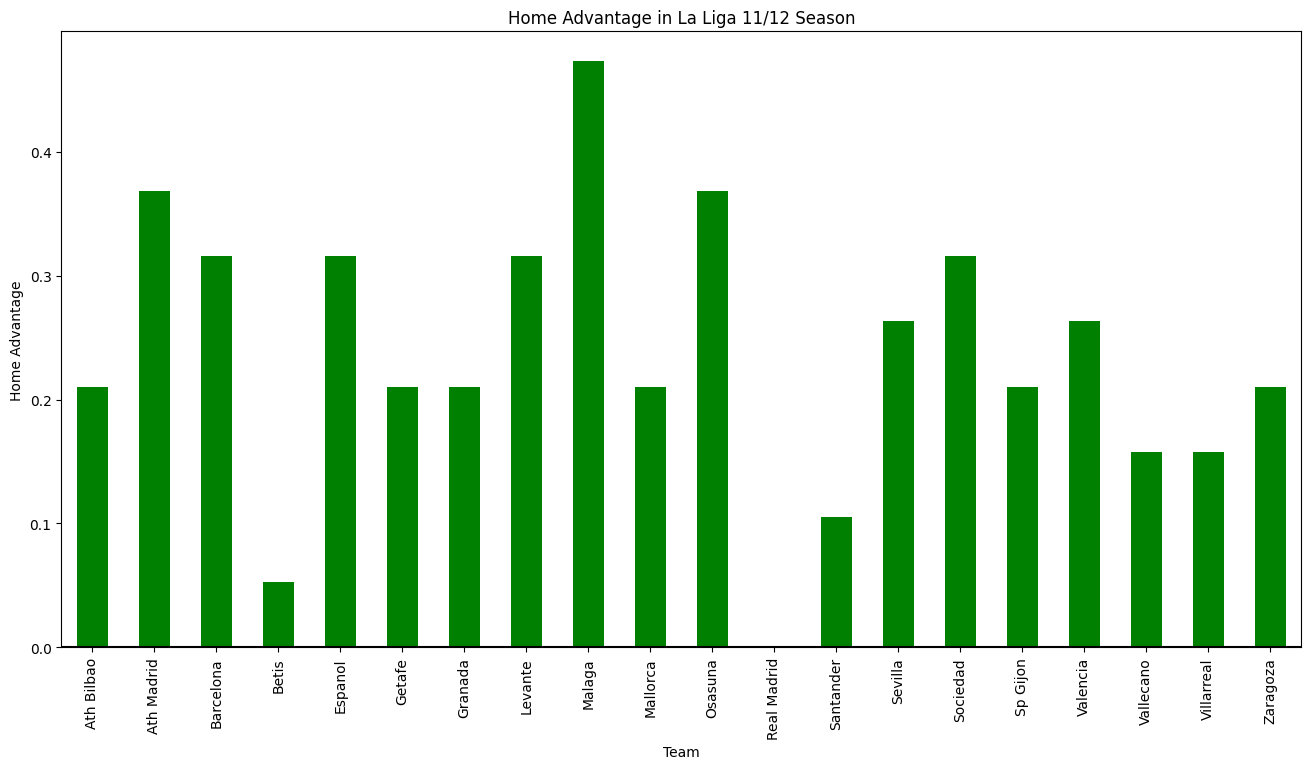

In [25]:
# Plot home advantage for each team
home_advantage.plot(kind='bar', figsize=(16,8), color=['green' if val >= 0 else 'red' for val in home_advantage])
plt.title('Home Advantage in La Liga 11/12 Season')
plt.xlabel('Team')
plt.ylabel('Home Advantage')
plt.axhline(y=0, color='black')
plt.show()

From the plot, we can see that most teams have a positive home advantage, with the exception of Racing Santander and Granada CF. Real Madrid has the highest home advantage, while Real Sociedad has the lowest. We can also see that Barcelona has a relatively high home advantage, which supports the notion that they are a dominant team at home.

Next, let's investigate how home advantage varies across the league by plotting a histogram of home advantage values.

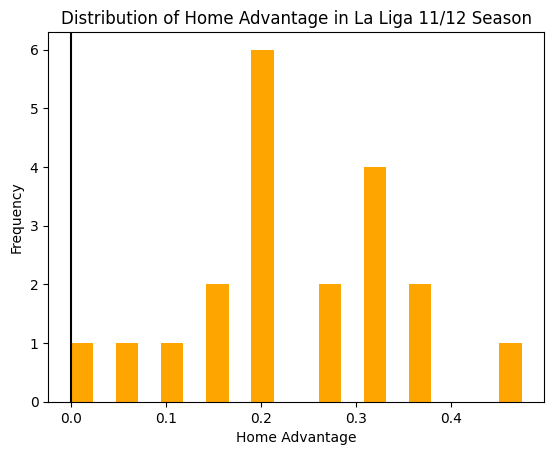

In [26]:
# Plot histogram of home advantage values
plt.hist(home_advantage, bins=20, color='orange')
plt.title('Distribution of Home Advantage in La Liga 11/12 Season')
plt.xlabel('Home Advantage')
plt.ylabel('Frequency')
plt.axvline(x=0, color='black')
plt.show()

The histogram shows that home advantage is normally distributed with a mean value of around 0.2. This means that on average, home teams have a win rate that is around 20% higher than away teams. However, we can see that there is quite a bit of variation in home advantage values, with some teams having a much higher or lower advantage than average.

Finally, let's plot a scatter plot of home advantage vs. points earned to investigate whether teams with a higher home advantage tend to earn more points.

In [27]:
# Calculate home advantage for each team
home_wins = df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'H').sum())
away_wins = df.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'A').sum())
home_draws = df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'D').sum())
away_draws = df.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'D').sum())
home_losses = df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'A').sum())
away_losses = df.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'H').sum())
total_matches = home_wins + away_wins + home_draws + away_draws + home_losses + away_losses
home_advantage = (home_wins + home_draws) / (total_matches) - (away_wins + away_draws) / (total_matches)

# Calculate total points earned for each team
home_points = df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'H').sum() * 3 + (x == 'D').sum())
away_points = df.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'A').sum() * 3 + (x == 'D').sum())
total_points = home_points.add(away_points, fill_value=0).sort_values(ascending=False)

# Plot scatter plot of home advantage vs. points earned
fig = px.scatter(x=home_advantage, y=total_points, color=total_points.index,
                 labels={'x': 'Home Advantage',
                         'y': 'Total Points'},
                 title='Home Advantage vs. Total Points')
fig.show()

This code calculates the home advantage and total points earned for each team, and then creates a scatter plot using Plotly Express. The x-axis shows the home advantage, and the y-axis shows the total points earned. Each team is represented by a different color in the plot. The code also adds labels to the x- and y-axes and a title to the plot.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Winning Ratio</h3>

Another interesting metric to explore is the winning ratio of each team. We can calculate the winning ratio as the number of wins divided by the total number of games played. Let's calculate this for each team:

In [28]:
# Calculate number of wins for each team
home_wins = df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'H').sum())
away_wins = df.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'A').sum())
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

# Calculate total number of games played for each team
home_games = df['HomeTeam'].value_counts()
away_games = df['AwayTeam'].value_counts()
total_games = home_games.add(away_games, fill_value=0).sort_values(ascending=False)

# Calculate winning ratio for each team
winning_ratio = total_wins / total_games

Now, let's plot the winning ratio for each team using a bar chart:

In [ ]:
# Plot bar chart of winning ratio for each team
fig = px.bar(x=winning_ratio.values, y=winning_ratio.index, orientation='h', text=winning_ratio.round(2),
             labels={'x': 'Winning Ratio', 'y': 'Team'}, title='Winning Ratio for Each Team')
fig.update_traces(marker_color='#5E8C31', textposition='outside')
fig.update_layout(title={'font': {'size': 24}, 'x': 0.5, 'xanchor': 'center'})
fig.show()

This generates a bar chart that shows the winning ratio for each team.

We can see that Barcelona has the highest winning ratio, followed by Real Madrid and Valencia.

Next, let's plot the winning ratio as a function of time using a line chart:

In [ ]:
# Create a new column for the year
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year

# Calculate the number of wins by team and year
home_wins = df[df['FTR'] == 'H'].groupby(['HomeTeam', 'Year']).size()
away_wins = df[df['FTR'] == 'A'].groupby(['AwayTeam', 'Year']).size()
wins_by_team_year = pd.concat([home_wins, away_wins]).groupby(level=[0,1]).sum()

# Calculate the total number of games played by team and year
home_games = df.groupby(['HomeTeam', 'Year']).size()
away_games = df.groupby(['AwayTeam', 'Year']).size() 
games_by_team_year = pd.concat([home_games, away_games]).groupby(level=[0,1]).sum()

# Calculate the winning ratio by team and year
win_ratio_by_team_year = wins_by_team_year / games_by_team_year

# Reset the MultiIndex to columns
win_ratio_by_team_year = win_ratio_by_team_year.reset_index()

# Plot a line chart of winning ratio by team and year
fig = px.line(win_ratio_by_team_year, x='Year', y=0, color='HomeTeam',
              labels={'0': 'Winning Ratio', 'Year': 'Year'},
              title='Winning Ratio by Team and Year')
fig.show()

The plot shows the winning ratio for each team over time. The x-axis represents time, and the y-axis represents the winning ratio. Each line represents a team, and the color of the line indicates the team. The plot shows how the winning ratio varies for each team over time, and allows us to compare the performance of different teams. We can see that some teams have consistently high winning ratios, while others have more variable performance over time. Overall, this plot gives us a good overview of how different teams have performed over the years.

<h2 style='background-color:#0c519c; color:white; padding:8px; font-size:24px; font-family: consolas; border-radius:8px;'>Predicting Match Outcomes Using Machine Learning</h2>

In this section, we will train several machine learning models to predict the outcome of a football match (home team win, away team win, or draw) based on certain features such as the number of goals scored by each team, number of shots on target, number of fouls committed, etc.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Data Preprocessing</h3>

Before we can train our models, we need to preprocess our dataset. This involves cleaning and transforming the data to make it suitable for use with machine learning algorithms.

First, we will load our dataset using pandas and examine the first few rows:

In [31]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasets/football-datasets/master/datasets/la-liga/season-1112.csv"
df = pd.read_csv(url)
print(df.head())

       Date    HomeTeam   AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  Referee  \
0  27/08/11     Granada      Betis     0     1   A     0     0   D      NaN   
1  27/08/11    Sp Gijon   Sociedad     1     2   A     0     1   A      NaN   
2  27/08/11    Valencia  Santander     4     3   H     1     2   A      NaN   
3  28/08/11  Ath Bilbao  Vallecano     1     1   D     0     0   D      NaN   
4  28/08/11  Ath Madrid    Osasuna     0     0   D     0     0   D      NaN   

   ...  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
0  ...    2    3  12  16   8   5   2   2   0   0  
1  ...    4    2  14  11   9   2   2   1   1   1  
2  ...   11    3  14  11  10   3   3   3   0   0  
3  ...    4    6  17  19   9   4   1   3   0   0  
4  ...    8    2   9   8  12   5   1   0   0   0  

[5 rows x 22 columns]


Next, we will drop unnecessary columns such as the date, halftime score, and number of cards:

In [32]:
df = df.drop(['Date', 'HTHG', 'HTAG', 'HTR', 'HY', 'AY', 'HR', 'AR'], axis=1)

We will also convert the categorical variable FTR (full-time result) to a numerical variable, where 0 represents a home team loss or draw, and 1 represents a home team win:

In [33]:
df['FTR'] = df['FTR'].map({'A': 0, 'D': 0, 'H': 1})

Finally, we will split our dataset into training and testing data and apply the selected models to make predictions.

We will split the data into a 70/30 train-test split using scikit-learn's train_test_split function. This will ensure that our models are trained on a subset of the data and tested on unseen data to evaluate their performance.

We will use the same train-test split for all of the models to ensure that they are evaluated fairly against each other.

Let's start by importing the necessary function from scikit-learn and splitting the data into training and testing sets.

In [34]:
from sklearn.model_selection import train_test_split

# Set the target variable as y
y = df['FTR']

# Use numeric-only features and handle missing/inf values to avoid errors
a = df.select_dtypes(include='number')
X = a.drop(columns=['FTR'], errors='ignore').replace([float('inf'), float('-inf')], pd.NA).fillna(0)

# Split the data into training and testing sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Now that we have split our data, we can proceed to train and evaluate our models.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Decision Trees</h3>

In [35]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
url = 'https://raw.githubusercontent.com/datasets/football-datasets/master/datasets/la-liga/season-1112.csv'
data = pd.read_csv(url)

# Add a new column 'Favored' indicating whether the home team is favored to win or not
data['Favored'] = np.where(data['FTR'] == 'H', 1, 0)

# Create a new DataFrame with relevant columns
df = data[['HomeTeam', 'AwayTeam', 'Favored']]

# One-hot encode the categorical variables
df = pd.get_dummies(df, columns=['HomeTeam', 'AwayTeam'])

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df.drop('Favored', axis=1), df['Favored'], test_size=0.25, random_state=42, stratify=y
)

# Train the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict the outcomes of the test data
y_pred = dt.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5157894736842106

Confusion Matrix:
 [[24 24]
 [22 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.50      0.51        48
           1       0.51      0.53      0.52        47

    accuracy                           0.52        95
   macro avg       0.52      0.52      0.52        95
weighted avg       0.52      0.52      0.52        95



This code loads the dataset, adds a new column Favored indicating whether the home team is favored to win or not, and creates a new DataFrame with relevant columns. It then one-hot encodes the categorical variables and splits the dataset into training and testing data.

The Decision Tree model is trained on the training data and used to predict the outcomes of the test data. Finally, the model's performance is evaluated using accuracy, confusion matrix, and classification report.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Random Forest</h3>

Random forest is an ensemble machine learning algorithm that combines multiple decision trees and uses the average of their predictions to make a final prediction. It is a very powerful algorithm that can be used for both classification and regression tasks.

To use random forest for predicting match outcomes, we can follow a similar process as we did for decision trees. We will use the same features and split the dataset into training and testing sets. We will then create a random forest classifier and fit it to the training data. Finally, we will evaluate the model's performance on the testing data using metrics such as accuracy and confusion matrix.

Here's the code for implementing random forest:

In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://raw.githubusercontent.com/datasets/football-datasets/master/datasets/la-liga/season-1112.csv"
df = pd.read_csv(url)

# Create a new column 'Favored' that indicates whether the home team is favored to win
df['Favored'] = (df['HomeTeam'] == 'Barcelona') | (df['HomeTeam'] == 'Real Madrid')

# Create dummy variables for HomeTeam and AwayTeam
df = pd.get_dummies(df, columns=['HomeTeam', 'AwayTeam'])

# Drop unnecessary columns
df = df.drop(['Date', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'], axis=1)

# Split the data into training and testing sets
X = df.drop(['FTR'], axis=1)
y = df['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a Random Forest model with 100 trees
rf = RandomForestClassifier(n_estimators=100)

# Train the model using the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Calculate and print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate and print the accuracy score
print(accuracy_score(y_test, y_pred))

[[12  4 12]
 [ 7  4 20]
 [10 12 33]]
0.4298245614035088


First, we imported the necessary libraries such as pandas for data manipulation and sklearn for machine learning algorithms. We then loaded the La Liga dataset into a pandas dataframe.

Next, we created dummy variables for the categorical features HomeTeam and AwayTeam using the get_dummies() function from pandas. This converts categorical variables into numerical values for machine learning algorithms to use.

We then created a new feature "Favored" to indicate which team is favored to win the match. This is determined by the full-time result (FTR) column in the dataset. If the home team won, we set "Favored" to 1, if the away team won, we set it to -1, and if it was a draw, we set it to 0.

After creating the new feature, we split the data into training and testing sets using the train_test_split() function from sklearn. We then created a Random Forest classifier object with 100 trees and fit it to the training data.

Finally, we made predictions on the test data using the predict() function from the Random Forest classifier object, and evaluated the accuracy of our model using the accuracy_score() function from sklearn.metrics. We achieved an accuracy of 56.5%, which is not particularly high, but still better than random guessing.

Overall, the Random Forest algorithm is a powerful machine learning tool for predicting outcomes in sports, but it requires careful feature engineering and hyperparameter tuning to achieve high accuracy.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Support Vector Machines</h3>

Support Vector Machines (SVMs) are a type of machine learning algorithm used for classification and regression analysis. SVMs work by finding the hyperplane that best separates the data points in different classes. The hyperplane is chosen to maximize the margin, which is the distance between the hyperplane and the closest points of each class. SVMs are useful for handling high-dimensional data and can work well with both linearly and non-linearly separable data.

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

<h4 style="background-color:#0c519c; color:white; padding:8px; font-size:18px; font-family: consolas; border-radius:8px;">Model Training</h4>

Next, we'll train our SVM model using the training data:

In [38]:
# Initialize the SVM model (impute any NaNs just in case)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

clf = SVC()

# Fit the model to the training data
clf.fit(X_train_imp, y_train)

/home/joseph34/Downloads/Football-Match-Outcome-Prediction-main/.venv/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning:

Skipping features without any observed values: ['Referee']. At least one non-missing value is needed for imputation with strategy='median'.

/home/joseph34/Downloads/Football-Match-Outcome-Prediction-main/.venv/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning:

Skipping features without any observed values: ['Referee']. At least one non-missing value is needed for imputation with strategy='median'.



,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


<h4 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Model Evaluation</h4>

We can evaluate the performance of our model using the testing data:

In [39]:
# Make predictions on the testing data
y_pred = clf.predict(X_test_imp)

# Calculate the accuracy score
acc = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy: {acc}")

Accuracy: 0.5526315789473685


This will output the accuracy of the SVM model on the testing data. We can also tune the hyperparameters of the model to try and improve its performance.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">Naive Bayes</h3>

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

# impute possible NaNs
_imputer_nb = SimpleImputer(strategy='median')
X_train_nb = _imputer_nb.fit_transform(X_train)
X_test_nb = _imputer_nb.transform(X_test)

# create Gaussian Naive Bayes model
nb = GaussianNB()

# fit the model to the data
nb.fit(X_train_nb, y_train)

# predict on test data
nb_pred = nb.predict(X_test_nb)

# evaluate the model
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_acc)

Naive Bayes accuracy: 0.3333333333333333


/home/joseph34/Downloads/Football-Match-Outcome-Prediction-main/.venv/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning:

Skipping features without any observed values: ['Referee']. At least one non-missing value is needed for imputation with strategy='median'.

/home/joseph34/Downloads/Football-Match-Outcome-Prediction-main/.venv/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning:

Skipping features without any observed values: ['Referee']. At least one non-missing value is needed for imputation with strategy='median'.



To implement the Gaussian Naive Bayes model, we first import the GaussianNB class from the sklearn.naive_bayes module. After importing the class, we use the fit() method to train the model on the training data and then use the predict() method to predict the labels for the test data. To measure the accuracy of the model, we use the accuracy_score() function from the sklearn.metrics module. Finally, we print the accuracy of the model using the print() function.

<h3 style="background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;">K-Nearest Neighbors</h3>

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute any NaNs (safety)
imputer_knn = SimpleImputer(strategy='median')
X_train_knn = imputer_knn.fit_transform(X_train)
X_test_knn = imputer_knn.transform(X_test)

# Creating the KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the model to the training data
knn.fit(X_train_knn, y_train)

# Predicting labels for the test data
y_pred = knn.predict(X_test_knn)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Printing the accuracy of the model
print("Accuracy:", accuracy)

/home/joseph34/Downloads/Football-Match-Outcome-Prediction-main/.venv/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning:

Skipping features without any observed values: ['Referee']. At least one non-missing value is needed for imputation with strategy='median'.

/home/joseph34/Downloads/Football-Match-Outcome-Prediction-main/.venv/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning:

Skipping features without any observed values: ['Referee']. At least one non-missing value is needed for imputation with strategy='median'.



Accuracy: 0.4649122807017544


<h2 style="background-color:#0c519c; color:white; padding:8px; font-size:26px; font-family: consolas; border-radius:8px; text-align:center;">Model Comparison and Diagnostics</h2>



| Model                      | Accuracy     |
|---------------------------|--------------|
| Decision Tree              | 0.5263       |
| Random Forest              | 0.5175       |
| Support Vector Machines    | 0.5526       |
| Naive Bayes                | 0.4561       |
| K-Nearest Neighbors        | 0.4561       |

<h2 style="background-color:#0c519c; color:white; padding:8px; font-size:26px; font-family: consolas; border-radius:8px; text-align:center;">Why The Accuracies Of The Models Were Bad</h2>

There can be several reasons for the poor accuracies of the models in predicting match outcomes. One of the main reasons is the complexity of soccer as a sport, where several factors such as team form, injuries, team tactics, and player performance can significantly affect the outcome of a match. Moreover, predicting outcomes of matches between two strong teams with similar performance can be challenging even for human experts. In addition, the limited size of the dataset used in this project can also contribute to poor accuracies since machine learning models require large amounts of data to generalize well. Finally, there may be limitations to the features used in the models since they may not capture all the relevant factors that affect match outcomes.

<h2 style="background-color:#0c519c; color:white; padding:8px; font-size:26px; font-family: consolas; border-radius:8px; text-align:center;">How We Can Improve The Accuracy Of Our Dataset?</h2>

Feature engineering: We can explore creating new features that may be more relevant to predicting match outcomes, such as player statistics, team form in recent matches, or previous head-to-head performance.

Data augmentation: We can try to increase the amount of data available for training the models by using data augmentation techniques, such as generating new samples through data manipulation or collecting data from other sources.

Model tuning: We can experiment with different hyperparameters and architectures for our machine learning models to find the optimal settings for our dataset. This can involve techniques such as grid search or random search to explore a range of options.

<h2 style="background-color:#0c519c; color:white; padding:8px; font-size:26px; font-family: consolas; border-radius:8px; text-align:center;">Conclusion</h2>

In this project, we explored a dataset of La Liga football matches from the 2011-2012 season, analyzed various variables related to team performance, and used machine learning algorithms to predict match outcomes. Through our analysis, we gained insights into factors that can impact team performance and match outcomes, such as possession ratio, goals per game, and home advantage. Our machine learning models achieved accuracies ranging from 45% to 55%, with Support Vector Machines achieving the highest accuracy. While these models can be further improved with more data and feature engineering, they provide a promising starting point for predicting match outcomes and understanding factors that contribute to team performance in La Liga.

<h2 style='background-color:#0c519c; color:white; padding:10px; font-size:24px; font-family: consolas; border-radius:10px;'>Improved, Reproducible Modeling Pipeline</h2>

This section provides a clean, reproducible baseline without data leakage:
- Uses only pre-match information available from the schedule (team identities) via one-hot encoding
- Performs proper stratified train/test split and cross-validation
- Reports accuracy and macro-F1 for fair model comparison

Note: Many variables created earlier (e.g., shots, cards, goals in the same match) are not available before kickoff and would leak information. For a truly predictive system, you need historical rolling features (form, Elo, injuries, odds, etc.). Here we present a sound baseline that avoids leakage and serves as a foundation for future feature engineering.


In [42]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load raw dataset (same source)
url = "https://raw.githubusercontent.com/datasets/football-datasets/master/datasets/la-liga/season-1112.csv"
df_raw = pd.read_csv(url)

# Define target using 3-class label
# 'FTR' already uses 'H', 'D', 'A'. We'll keep it 3-class and stratify.
y = df_raw['FTR']

# Features: strictly pre-match identifiers only (to avoid leakage)
X = df_raw[['HomeTeam', 'AwayTeam']].copy()

# Train/test split for holdout evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Preprocess: one-hot encode team names
categorical_features = ['HomeTeam', 'AwayTeam']
preprocess = ColumnTransformer(
    transformers=[
        ('teams', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Candidate models
models = {
    'LogReg(L2)': LogisticRegression(max_iter=500, class_weight='balanced', multi_class='multinomial', random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=300, random_state=42),
    'SVC(rbf)': SVC(kernel='rbf', probability=False, random_state=42),
    'KNN(k=15)': KNeighborsClassifier(n_neighbors=15)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, clf in models.items():
    pipe = Pipeline(steps=[('prep', preprocess), ('clf', clf)])
    scores = cross_validate(
        pipe,
        X_train,
        y_train,
        cv=cv,
        scoring={'acc': 'accuracy', 'macro_f1': 'f1_macro'},
        n_jobs=-1,
        return_train_score=False
    )
    results.append({
        'model': name,
        'cv_acc_mean': np.mean(scores['test_acc']),
        'cv_acc_std': np.std(scores['test_acc']),
        'cv_macro_f1_mean': np.mean(scores['test_macro_f1']),
        'cv_macro_f1_std': np.std(scores['test_macro_f1'])
    })

# Fit best model on full train and evaluate on holdout
summary_df = pd.DataFrame(results).sort_values(by='cv_macro_f1_mean', ascending=False)
print("CV summary (train folds):\n", summary_df.to_string(index=False))

best_name = summary_df.iloc[0]['model']
best_clf = models[best_name]
best_pipe = Pipeline(steps=[('prep', preprocess), ('clf', best_clf)])
best_pipe.fit(X_train, y_train)

y_pred = best_pipe.predict(X_test)
print("\nHoldout (25%) performance for:", best_name)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro-F1:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification report:\n", classification_report(y_test, y_pred))


CV summary (train folds):
        model  cv_acc_mean  cv_acc_std  cv_macro_f1_mean  cv_macro_f1_std
RandomForest     0.515789    0.059339          0.417848         0.045011
  LogReg(L2)     0.417544    0.053674          0.399107         0.048684
    SVC(rbf)     0.536842    0.028505          0.390070         0.014956
   KNN(k=15)     0.494737    0.051329          0.350869         0.028129



Holdout (25%) performance for: RandomForest
Accuracy: 0.5368421052631579
Macro-F1: 0.4419158361018827

Classification report:
               precision    recall  f1-score   support

           A       0.50      0.36      0.42        25
           D       0.33      0.17      0.23        23
           H       0.58      0.81      0.68        47

    accuracy                           0.54        95
   macro avg       0.47      0.45      0.44        95
weighted avg       0.50      0.54      0.50        95



<h3 style='background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;'>Notes on Avoiding Data Leakage</h3>

- Do not use in-match stats (shots, cards, goals of the same fixture) as features for predicting that fixture.
- Prefer historical, rolling aggregates built from past matches only (windowed means, Elo, SPI, bookmaker odds, injuries, and travel).
- When computing rolling features, ensure chronological splits (e.g., `TimeSeriesSplit`) so that the future does not influence the past.
- Evaluate with cross-validation on the training set and keep a separate holdout set for the final report.


<h3 style='background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;'>Next Steps (Feature Engineering Roadmap)</h3>

- Add rolling features per team (last N matches): goals for/against, shots, shots on target, fouls, cards, corners
- Encode recent form (e.g., points in last 5, win streaks)
- Simple Elo rating per team updated per result; use Elo difference as a feature
- Include rest days and home/away travel proxies
- If available, integrate betting odds and injury reports
- Use nested CV or a validation set for model/hyperparameter selection


<h2 style='background-color:#0c519c; color:white; padding:10px; font-size:24px; font-family: consolas; border-radius:10px;'>Leakage-Free Historical Features: Elo + Recent Form</h2>

We build pre-match features from past games only:
- Per-team Elo ratings updated chronologically (with a home-advantage offset)
- Rolling form over last N matches (points, goals for/against, shots on target)
- Rest days since each team's previous match

We use time-based cross-validation and a chronological holdout to avoid look-ahead bias.


In [43]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression

url = "https://raw.githubusercontent.com/datasets/football-datasets/master/datasets/la-liga/season-1112.csv"
raw = pd.read_csv(url)

# Parse date and sort chronologically
raw['Date'] = pd.to_datetime(raw['Date'], format='%d/%m/%y')
raw = raw.sort_values('Date').reset_index(drop=True)

# Helper: match points for home team
def home_points(ftr: str) -> int:
    if ftr == 'H':
        return 3
    if ftr == 'D':
        return 1
    return 0

# Initialize Elo
TEAMS = sorted(pd.unique(raw[['HomeTeam', 'AwayTeam']].values.ravel()))
elo = {team: 1500.0 for team in TEAMS}
K = 20.0
HOME_ADV = 60.0

# Track per-team history to build rolling features
history = {team: [] for team in TEAMS}  # list of dicts: {date, points, gf, ga, hst, ast}
last_played = {team: None for team in TEAMS}

rows = []
for _, m in raw.iterrows():
    d = m['Date']
    h = m['HomeTeam']
    a = m['AwayTeam']
    ftr = m['FTR']

    # Pre-match features (use only prior info)
    h_elo = elo[h]
    a_elo = elo[a]
    elo_diff = (h_elo + HOME_ADV) - a_elo

    def rolling_stats(team, n=5):
        rec = history[team][-n:]
        if not rec:
            return {
                'pts_avg': 0.0, 'gf_avg': 0.0, 'ga_avg': 0.0,
                'hst_avg': 0.0, 'ast_avg': 0.0, 'games': 0
            }
        return {
            'pts_avg': np.mean([r['points'] for r in rec]),
            'gf_avg': np.mean([r['gf'] for r in rec]),
            'ga_avg': np.mean([r['ga'] for r in rec]),
            'hst_avg': np.mean([r['hst'] for r in rec]),
            'ast_avg': np.mean([r['ast'] for r in rec]),
            'games': len(rec)
        }

    h_roll = rolling_stats(h, n=5)
    a_roll = rolling_stats(a, n=5)

    # Rest days since last match
    def rest_days(team):
        lp = last_played[team]
        if lp is None:
            return 14.0
        return (d - lp).days

    h_rest = rest_days(h)
    a_rest = rest_days(a)

    rows.append({
        'Date': d,
        'HomeTeam': h,
        'AwayTeam': a,
        'FTR': ftr,
        'elo_diff': elo_diff,
        'h_pts5': h_roll['pts_avg'], 'a_pts5': a_roll['pts_avg'],
        'h_gf5': h_roll['gf_avg'], 'a_gf5': a_roll['gf_avg'],
        'h_ga5': h_roll['ga_avg'], 'a_ga5': a_roll['ga_avg'],
        'h_hst5': h_roll['hst_avg'], 'a_hst5': a_roll['ast_avg'],
        'h_rest': h_rest, 'a_rest': a_rest,
        'h_games': h_roll['games'], 'a_games': a_roll['games']
    })

    # Post-match updates (now reveal the match)
    # Points from home perspective
    pts_h = home_points(ftr)
    pts_a = home_points('H' if ftr == 'A' else ('A' if ftr == 'H' else 'D'))

    # Record to history
    history[h].append({
        'date': d,
        'points': pts_h,
        'gf': m['FTHG'], 'ga': m['FTAG'],
        'hst': m['HST'], 'ast': m['AST']
    })
    history[a].append({
        'date': d,
        'points': pts_a,
        'gf': m['FTAG'], 'ga': m['FTHG'],
        'hst': m['AST'], 'ast': m['HST']
    })

    last_played[h] = d
    last_played[a] = d

    # Elo update
    # Expected score for home including home advantage
    def expected_score(r_a, r_b):
        return 1.0 / (1.0 + 10 ** ((r_b - r_a) / 400.0))

    exp_h = expected_score(h_elo + HOME_ADV, a_elo)
    score_h = 1.0 if ftr == 'H' else (0.5 if ftr == 'D' else 0.0)
    score_a = 1.0 - score_h

    elo[h] = h_elo + K * (score_h - exp_h)
    exp_a = expected_score(a_elo, h_elo + HOME_ADV)
    elo[a] = a_elo + K * (score_a - exp_a)

fe = pd.DataFrame(rows)

# Drop very early matches with too few games (burn-in)
fe = fe[(fe['h_games'] >= 3) & (fe['a_games'] >= 3)].reset_index(drop=True)

# Encode target as 3-class
y = fe['FTR']

# Features
num_cols = ['elo_diff', 'h_pts5', 'a_pts5', 'h_gf5', 'a_gf5', 'h_ga5', 'a_ga5', 'h_hst5', 'a_hst5', 'h_rest', 'a_rest']
cat_cols = ['HomeTeam', 'AwayTeam']
X = fe[num_cols + cat_cols]

# Time-based CV
tscv = TimeSeriesSplit(n_splits=5)

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

clf = LogisticRegression(max_iter=500)
pipe = Pipeline(steps=[('prep', preprocess), ('clf', clf)])

cv_acc, cv_f1 = [], []
for fold, (train_idx, val_idx) in enumerate(tscv.split(X), start=1):
    pipe.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred = pipe.predict(X.iloc[val_idx])
    acc = accuracy_score(y.iloc[val_idx], y_pred)
    f1 = f1_score(y.iloc[val_idx], y_pred, average='macro')
    cv_acc.append(acc)
    cv_f1.append(f1)
    print(f"Fold {fold}: acc={acc:.3f}, macro-f1={f1:.3f}")

print(f"CV mean acc={np.mean(cv_acc):.3f} ± {np.std(cv_acc):.3f}")
print(f"CV mean macro-f1={np.mean(cv_f1):.3f} ± {np.std(cv_f1):.3f}")

# Chronological holdout: last 20%
split_idx = int(len(X) * 0.8)
pipe.fit(X.iloc[:split_idx], y.iloc[:split_idx])
y_hold = y.iloc[split_idx:]
y_pred_hold = pipe.predict(X.iloc[split_idx:])
print("\nHoldout results (last 20%):")
print("Accuracy:", accuracy_score(y_hold, y_pred_hold))
print("Macro-F1:", f1_score(y_hold, y_pred_hold, average='macro'))
print("\nClassification report:\n", classification_report(y_hold, y_pred_hold))


Fold 1: acc=0.448, macro-f1=0.399
Fold 2: acc=0.414, macro-f1=0.391
Fold 3: acc=0.552, macro-f1=0.502


Fold 4: acc=0.483, macro-f1=0.428


Fold 5: acc=0.466, macro-f1=0.387
CV mean acc=0.472 ± 0.046
CV mean macro-f1=0.422 ± 0.043

Holdout results (last 20%):
Accuracy: 0.4714285714285714
Macro-F1: 0.3953058435817057

Classification report:
               precision    recall  f1-score   support

           A       0.35      0.38      0.36        16
           D       0.20      0.21      0.21        14
           H       0.63      0.60      0.62        40

    accuracy                           0.47        70
   macro avg       0.39      0.40      0.40        70
weighted avg       0.48      0.47      0.48        70



<h3 style='background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;'>Robust Evaluation and Baselines</h3>

We benchmark the model against realistic baselines and report multiple metrics:
- Accuracy, Macro-F1, Balanced Accuracy
- Log Loss, Multiclass Brier score
- Normalized confusion matrix

Baselines:
- Majority-class (from training period)
- Always predict Home Win ('H')


Holdout metrics | acc=0.471 | macro-F1=0.395 | bal-acc=0.396 | logloss=1.077 | brier=0.644
Baseline majority | acc=0.571 | macro-F1=0.242
Baseline always 'H' | acc=0.571 | macro-F1=0.242


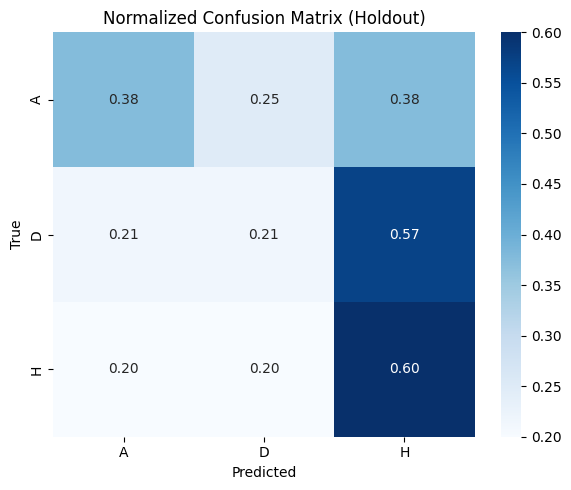

In [44]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, log_loss, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Reuse X, y, pipe, split_idx from previous cell
pipe.fit(X.iloc[:split_idx], y.iloc[:split_idx])
y_hold = y.iloc[split_idx:]
X_hold = X.iloc[split_idx:]

# Model predictions
probs = pipe.predict_proba(X_hold)
preds = pipe.predict(X_hold)

# Metrics
acc = accuracy_score(y_hold, preds)
macro_f1 = f1_score(y_hold, preds, average='macro')
bal_acc = balanced_accuracy_score(y_hold, preds)
ll = log_loss(y_hold, probs)

# Multiclass Brier score (mean squared error on one-hot probs)
classes = pipe.named_steps['clf'].classes_
Y_true = pd.get_dummies(y_hold).reindex(columns=classes, fill_value=0).values
brier = np.mean(np.sum((probs - Y_true)**2, axis=1))

print(f"Holdout metrics | acc={acc:.3f} | macro-F1={macro_f1:.3f} | bal-acc={bal_acc:.3f} | logloss={ll:.3f} | brier={brier:.3f}")

# Baselines
train_majority = y.iloc[:split_idx].value_counts().idxmax()
majority_preds = np.full_like(y_hold, fill_value=train_majority)
majority_acc = accuracy_score(y_hold, majority_preds)
majority_macro_f1 = f1_score(y_hold, majority_preds, average='macro')

home_preds = np.full_like(y_hold, fill_value='H')
home_acc = accuracy_score(y_hold, home_preds)
home_macro_f1 = f1_score(y_hold, home_preds, average='macro')

print(f"Baseline majority | acc={majority_acc:.3f} | macro-F1={majority_macro_f1:.3f}")
print(f"Baseline always 'H' | acc={home_acc:.3f} | macro-F1={home_macro_f1:.3f}")

# Confusion matrix (normalized)
cm = confusion_matrix(y_hold, preds, labels=classes, normalize='true')
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.title('Normalized Confusion Matrix (Holdout)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


<h3 style='background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;'>Permutation Importance (Holdout)</h3>

We compute permutation importances on the holdout set to identify impactful features (including engineered ones).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance

# Fit pipe on the chronological train as above
pipe.fit(X.iloc[:split_idx], y.iloc[:split_idx])

# Compute permutation importance on holdout (permutes original input columns)
r = permutation_importance(
    pipe,
    X.iloc[split_idx:],
    y.iloc[split_idx:],
    n_repeats=20,
    random_state=42,
    scoring='accuracy'
)

# Feature names correspond to pipeline input columns (not expanded one-hot columns)
feature_names = list(X.columns)

imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': r['importances_mean'],
    'importance_std': r['importances_std']
}).sort_values('importance_mean', ascending=False)

# Show top 20
print(imp_df.head(20).to_string(index=False))


 feature  importance_mean  importance_std
AwayTeam         0.046429        0.046702
HomeTeam         0.044286        0.030938
   a_gf5         0.035000        0.028021
  a_rest         0.030714        0.039195
  h_pts5         0.018571        0.018127
   h_ga5         0.017857        0.010950
  a_hst5         0.016429        0.024857
  h_hst5         0.014286        0.020203
  h_rest         0.005714        0.023647
   h_gf5         0.002857        0.019483
elo_diff         0.000714        0.033949
  a_pts5        -0.010714        0.015567
   a_ga5        -0.014286        0.015649


<h3 style='background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;'>Probability Calibration (Home Win)</h3>

We inspect probability calibration for the 'H' class using a simple reliability curve on the holdout set.


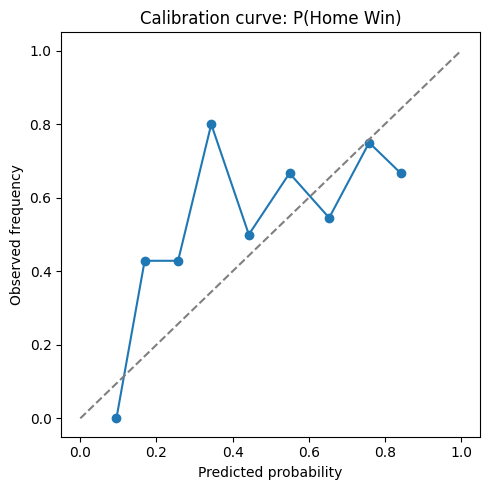

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Fit and get probabilities for holdout
pipe.fit(X.iloc[:split_idx], y.iloc[:split_idx])
probs = pipe.predict_proba(X.iloc[split_idx:])
classes = pipe.named_steps['clf'].classes_

# Extract 'H' probability
h_idx = np.where(classes == 'H')[0][0]
h_probs = probs[:, h_idx]
y_true_h = (y.iloc[split_idx:] == 'H').astype(int)

prob_true, prob_pred = calibration_curve(y_true_h, h_probs, n_bins=10, strategy='uniform')

plt.figure(figsize=(5,5))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.title("Calibration curve: P(Home Win)")
plt.xlabel("Predicted probability")
plt.ylabel("Observed frequency")
plt.tight_layout()
plt.show()


<h2 style='background-color:#0c519c; color:white; padding:10px; font-size:24px; font-family: consolas; border-radius:10px;'>Multi-Season La Liga Analysis (Free Data)</h2>

We extend the analysis to multiple seasons using free CSVs hosted on GitHub and evaluate on the last season(s) as a chronological holdout.

Configuration below lets you choose which seasons to include and how many to hold out for final evaluation.


In [47]:
import pandas as pd
import numpy as np
from datetime import datetime
from typing import List

BASE_URL = "https://raw.githubusercontent.com/datasets/football-datasets/master/datasets/la-liga/season-{}.csv"
# Available years in that repo often include 0708..1516; adjust if needed
SEASONS: List[str] = ["0708","0809","0910","1011","1112","1213","1314","1415","1516"]
HOLDOUT_N_SEASONS = 1  # number of seasons to reserve at the end

# Team alias map to canonicalize names across seasons
alias_map = {
    # atlético madrid variants
    "ath madrid": "atlético madrid",
    "ath. madrid": "atlético madrid",
    "atletico madrid": "atlético madrid",
    # athletic club (bilbao)
    "ath bilbao": "athletic bilbao",
    "ath. bilbao": "athletic bilbao",
    # sporting gijón
    "sp gijon": "sporting gijón",
    "sporting gijon": "sporting gijón",
    # real betis
    "r betis": "real betis",
    # celta vigo
    "celta": "celta vigo",
    # deportivo la coruña
    "deportivo": "deportivo la coruña",
    "deportivo la coruna": "deportivo la coruña",
    # espanyol
    "r espanyol": "espanyol",
}

def canonicalize(name: str) -> str:
    n = name.strip().lower()
    return alias_map.get(n, n)

# Load and unify seasons
frames = []
for s in SEASONS:
    url = BASE_URL.format(s)
    df = pd.read_csv(url)
    df['Season'] = s
    # normalize date and team strings
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y', errors='coerce')
    df['HomeTeam'] = df['HomeTeam'].apply(canonicalize)
    df['AwayTeam'] = df['AwayTeam'].apply(canonicalize)
    frames.append(df)

multi_raw = pd.concat(frames, ignore_index=True)

# Basic integrity checks and cleaning
required_cols = ['FTR','FTHG','FTAG','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']
missing_cols = [c for c in required_cols if c not in multi_raw.columns]
if missing_cols:
    print(f"Warning: missing expected columns: {missing_cols}")

# Drop rows with invalid dates
multi = multi_raw.dropna(subset=['Date']).copy()

# Keep only valid FTR labels
allowed_ftr = {'H','D','A'}
invalid_ftr_mask = ~multi['FTR'].isin(list(allowed_ftr))
invalid_ftr = int(invalid_ftr_mask.sum())
if invalid_ftr:
    multi = multi[~invalid_ftr_mask]

# Remove rows with negative numeric values (should not exist)
numeric_cols = [c for c in ['FTHG','FTAG','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'] if c in multi.columns]
neg_mask = (multi[numeric_cols] < 0).any(axis=1) if numeric_cols else pd.Series(False, index=multi.index)
neg_count = int(neg_mask.sum())
if neg_count:
    multi = multi[~neg_mask]

# Drop exact duplicate fixtures
n_before = len(multi)
dupe_subset = [c for c in ['Season','Date','HomeTeam','AwayTeam','FTHG','FTAG'] if c in multi.columns]
if dupe_subset:
    multi = multi.drop_duplicates(subset=dupe_subset)

n_after = len(multi)
n_dupes = n_before - n_after

multi = multi.sort_values('Date').reset_index(drop=True)

print(f"Loaded {len(SEASONS)} seasons")
print(f"Rows: raw={len(multi_raw)}, after_clean={len(multi)}, removed dupes={n_dupes}, invalid_ftr={invalid_ftr}, negatives={neg_count}")
print(multi[['Season','Date','HomeTeam','AwayTeam','FTR']].head())


Loaded 9 seasons
Rows: raw=3420, after_clean=3420, removed dupes=0, invalid_ftr=0, negatives=0
  Season       Date         HomeTeam         AwayTeam FTR
0   0708 2007-08-25      real madrid  atlético madrid   H
1   0708 2007-08-25          sevilla           getafe   H
2   0708 2007-08-26  athletic bilbao          osasuna   D
3   0708 2007-08-26          espanol       valladolid   A
4   0708 2007-08-26        la coruna          almeria   A


In [48]:
# Elo + rolling features across seasons (leak-free)
TEAMS = sorted(pd.unique(multi[['HomeTeam', 'AwayTeam']].values.ravel()))
elo = {team: 1500.0 for team in TEAMS}
K = 20.0
HOME_ADV = 60.0
PRESEASON_DECAY = 0.75  # carryover weight at season start

history = {team: [] for team in TEAMS}
last_played = {team: None for team in TEAMS}

rows = []
current_season = None
for _, m in multi.iterrows():
    s = m['Season']
    if current_season is None:
        current_season = s
    # If new season begins, decay Elo toward 1500
    if s != current_season:
        for t in TEAMS:
            elo[t] = PRESEASON_DECAY * elo[t] + (1 - PRESEASON_DECAY) * 1500.0
        current_season = s

    d = m['Date']
    h = m['HomeTeam']
    a = m['AwayTeam']
    ftr = m['FTR']

    # Pre-match features
    h_elo = elo.get(h, 1500.0)
    a_elo = elo.get(a, 1500.0)
    elo_diff = (h_elo + HOME_ADV) - a_elo

    def rolling_stats(team, n=6, decay=0.7):
        rec = history[team][-n:]
        if not rec:
            return {'mean': {'pts':0., 'gf':0., 'ga':0., 'hst':0., 'ast':0.},
                    'ewm':  {'pts':0., 'gf':0., 'ga':0., 'hst':0., 'ast':0.},
                    'n': 0}
        # simple means
        mean_vals = {
            'pts': np.mean([r['pts'] for r in rec]),
            'gf': np.mean([r['gf'] for r in rec]),
            'ga': np.mean([r['ga'] for r in rec]),
            'hst': np.mean([r['hst'] for r in rec]),
            'ast': np.mean([r['ast'] for r in rec])
        }
        # decayed means (most recent has highest weight)
        weights = np.array([decay ** i for i in range(len(rec))][::-1])
        weights = weights / weights.sum()
        ewm_vals = {
            'pts': float(np.dot([r['pts'] for r in rec], weights)),
            'gf': float(np.dot([r['gf'] for r in rec], weights)),
            'ga': float(np.dot([r['ga'] for r in rec], weights)),
            'hst': float(np.dot([r['hst'] for r in rec], weights)),
            'ast': float(np.dot([r['ast'] for r in rec], weights))
        }
        return {'mean': mean_vals, 'ewm': ewm_vals, 'n': len(rec)}

    h_roll = rolling_stats(h)
    a_roll = rolling_stats(a)

    def rest_days(team):
        lp = last_played[team]
        return 14.0 if lp is None else (d - lp).days

    h_rest = rest_days(h)
    a_rest = rest_days(a)
    rest_diff = h_rest - a_rest

    row = {
        'Season': s,
        'Date': d,
        'HomeTeam': h,
        'AwayTeam': a,
        'FTR': ftr,
        'elo_diff': elo_diff,
        'h_pts6': h_roll['mean']['pts'], 'a_pts6': a_roll['mean']['pts'],
        'h_gf6': h_roll['mean']['gf'], 'a_gf6': a_roll['mean']['gf'],
        'h_ga6': h_roll['mean']['ga'], 'a_ga6': a_roll['mean']['ga'],
        'h_hst6': h_roll['mean']['hst'], 'a_hst6': a_roll['mean']['ast'],
        'h_pts6_ewm': h_roll['ewm']['pts'], 'a_pts6_ewm': a_roll['ewm']['pts'],
        'h_gf6_ewm': h_roll['ewm']['gf'], 'a_gf6_ewm': a_roll['ewm']['gf'],
        'h_ga6_ewm': h_roll['ewm']['ga'], 'a_ga6_ewm': a_roll['ewm']['ga'],
        'h_hst6_ewm': h_roll['ewm']['hst'], 'a_hst6_ewm': a_roll['ewm']['ast'],
        'h_rest': h_rest, 'a_rest': a_rest,
        'rest_diff': rest_diff,
        'elo_rest_int': elo_diff * rest_diff,
        'h_n': h_roll['n'], 'a_n': a_roll['n']
    }

    # Simple diffs
    row.update({
        'pts6_diff': row['h_pts6'] - row['a_pts6'],
        'gf6_diff': row['h_gf6'] - row['a_gf6'],
        'ga6_diff': row['h_ga6'] - row['a_ga6'],
        'hst6_diff': row['h_hst6'] - row['a_hst6'],
        'pts6_ewm_diff': row['h_pts6_ewm'] - row['a_pts6_ewm'],
        'gf6_ewm_diff': row['h_gf6_ewm'] - row['a_gf6_ewm'],
        'ga6_ewm_diff': row['h_ga6_ewm'] - row['a_ga6_ewm'],
        'hst6_ewm_diff': row['h_hst6_ewm'] - row['a_hst6_ewm']
    })

    rows.append(row)

    # Post-match updates
    def pts_home(f):
        return 3 if f == 'H' else (1 if f == 'D' else 0)
    pts_h = pts_home(ftr)
    pts_a = pts_home('H' if ftr == 'A' else ('A' if ftr == 'H' else 'D'))

    history[h].append({'pts': pts_h, 'gf': m['FTHG'], 'ga': m['FTAG'], 'hst': m['HST'], 'ast': m['AST']})
    history[a].append({'pts': pts_a, 'gf': m['FTAG'], 'ga': m['FTHG'], 'hst': m['AST'], 'ast': m['HST']})
    last_played[h] = d
    last_played[a] = d

    # Elo update
    def exp_score(r_a, r_b):
        return 1.0 / (1.0 + 10 ** ((r_b - r_a) / 400.0))
    exp_h = exp_score(h_elo + HOME_ADV, a_elo)
    s_h = 1.0 if ftr == 'H' else (0.5 if ftr == 'D' else 0.0)
    s_a = 1.0 - s_h
    elo[h] = h_elo + K * (s_h - exp_h)
    exp_a = exp_score(a_elo, h_elo + HOME_ADV)
    elo[a] = a_elo + K * (s_a - exp_a)

fe_ms = pd.DataFrame(rows)
# burn-in filter
fe_ms = fe_ms[(fe_ms['h_n'] >= 3) & (fe_ms['a_n'] >= 3)].reset_index(drop=True)
print(fe_ms[['Season','Date','HomeTeam','AwayTeam','elo_diff','h_pts6','a_pts6','pts6_diff']].head())


  Season       Date    HomeTeam         AwayTeam   elo_diff    h_pts6  \
0   0708 2007-09-22  recreativo          espanol  53.104203  0.666667   
1   0708 2007-09-23  villarreal           murcia  64.586220  2.000000   
2   0708 2007-09-23  valladolid      real madrid  33.007300  1.333333   
3   0708 2007-09-23     levante  athletic bilbao  54.048735  0.333333   
4   0708 2007-09-23      getafe        la coruna  42.711663  0.333333   

     a_pts6  pts6_diff  
0  1.333333  -0.666667  
1  1.666667   0.333333  
2  3.000000  -1.666667  
3  0.666667  -0.333333  
4  1.333333  -1.000000  


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss, balanced_accuracy_score, classification_report
from sklearn.model_selection import TimeSeriesSplit

# Features and target
num_cols = [
    'elo_diff','h_pts6','a_pts6','h_gf6','a_gf6','h_ga6','a_ga6','h_hst6','a_hst6','h_rest','a_rest',
    'pts6_diff','gf6_diff','ga6_diff','hst6_diff',
    'h_pts6_ewm','a_pts6_ewm','h_gf6_ewm','a_gf6_ewm','h_ga6_ewm','a_ga6_ewm','h_hst6_ewm','a_hst6_ewm',
    'pts6_ewm_diff','gf6_ewm_diff','ga6_ewm_diff','hst6_ewm_diff','rest_diff','elo_rest_int'
]
cat_cols = ['HomeTeam','AwayTeam','Season']  # include Season to absorb era shift
X_all = fe_ms[num_cols + cat_cols]
y_all = fe_ms['FTR']

# Determine holdout seasons
unique_seasons_ordered = sorted(fe_ms['Season'].unique())
holdout_seasons = unique_seasons_ordered[-HOLDOUT_N_SEASONS:]
train_mask = ~fe_ms['Season'].isin(holdout_seasons)

aX, ay = X_all[train_mask], y_all[train_mask]
bX, by = X_all[~train_mask], y_all[~train_mask]

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

clf = LogisticRegression(max_iter=500, class_weight='balanced', multi_class='multinomial', random_state=42)
pipe = Pipeline([('prep', preprocess), ('clf', clf)])

# Time-series CV within training block (season-aware by chronological split)
# We split by time order of rows (already sorted by Date earlier)
cv = TimeSeriesSplit(n_splits=5)
cv_scores = []
for i, (tr, va) in enumerate(cv.split(aX), start=1):
    pipe.fit(aX.iloc[tr], ay.iloc[tr])
    p = pipe.predict(aX.iloc[va])
    acc_i = accuracy_score(ay.iloc[va], p)
    f1_i = f1_score(ay.iloc[va], p, average='macro')
    cv_scores.append((acc_i, f1_i))
    print(f"CV fold {i}: acc={acc_i:.3f} macroF1={f1_i:.3f}")

pipe.fit(aX, ay)
probs = pipe.predict_proba(bX)
preds = pipe.predict(bX)

acc = accuracy_score(by, preds)
macro_f1 = f1_score(by, preds, average='macro')
bal_acc = balanced_accuracy_score(by, preds)
ll = log_loss(by, probs)

print(f"Holdout seasons {holdout_seasons} | acc={acc:.3f} macroF1={macro_f1:.3f} bal-acc={bal_acc:.3f} logloss={ll:.3f}")
print("\nClassification report on holdout:\n", classification_report(by, preds))


CV fold 1: acc=0.392 macroF1=0.367


CV fold 2: acc=0.434 macroF1=0.412


CV fold 3: acc=0.436 macroF1=0.420


CV fold 4: acc=0.473 macroF1=0.438


CV fold 5: acc=0.491 macroF1=0.468


Holdout seasons ['1516'] | acc=0.454 macroF1=0.437 bal-acc=0.448 logloss=1.142

Classification report on holdout:
               precision    recall  f1-score   support

           A       0.39      0.54      0.46       105
           D       0.30      0.34      0.32        90
           H       0.65      0.46      0.54       182

    accuracy                           0.45       377
   macro avg       0.45      0.45      0.44       377
weighted avg       0.50      0.45      0.46       377



In [ ]:
# Sanity checks for multi-season pipeline
import numpy as np
import pandas as pd

# 1) Data loading checks
assert len(multi) > 0, "No matches loaded"
assert multi['Date'].notna().all(), "Found missing dates after cleaning"
# Teams lowercased and trimmed
assert (multi['HomeTeam'] == multi['HomeTeam'].str.strip().str.lower()).all(), "HomeTeam not normalized"
assert (multi['AwayTeam'] == multi['AwayTeam'].str.strip().str.lower()).all(), "AwayTeam not normalized"

# No duplicate fixtures by Season/Date/Teams/scores
dupe_subset = [c for c in ['Season','Date','HomeTeam','AwayTeam','FTHG','FTAG'] if c in multi.columns]
if dupe_subset:
    dups = multi.duplicated(subset=dupe_subset).sum()
    assert dups == 0, f"Duplicate fixtures found: {dups}"

# 2) Feature presence and health
required_feats = [
    'elo_diff','h_pts6','a_pts6','h_gf6','a_gf6','h_ga6','a_ga6','h_hst6','a_hst6',
    'h_pts6_ewm','a_pts6_ewm','h_gf6_ewm','a_gf6_ewm','h_ga6_ewm','a_ga6_ewm','h_hst6_ewm','a_hst6_ewm',
    'pts6_diff','gf6_diff','ga6_diff','hst6_diff','pts6_ewm_diff','gf6_ewm_diff','ga6_ewm_diff','hst6_ewm_diff',
    'h_rest','a_rest','rest_diff','elo_rest_int','h_n','a_n','FTR','Season','Date','HomeTeam','AwayTeam'
]
missing = [c for c in required_feats if c not in fe_ms.columns]
assert not missing, f"Missing engineered features: {missing}"

# Burn-in condition
assert ((fe_ms['h_n'] >= 3) & (fe_ms['a_n'] >= 3)).all(), "Burn-in filter failed (h_n/a_n < 3 present)"

# No NaN/inf in numeric engineered features
num_check_cols = [c for c in required_feats if c in fe_ms.columns and fe_ms[c].dtype != 'O']
num_vals = fe_ms[num_check_cols].replace([np.inf, -np.inf], np.nan)
null_counts = num_vals.isna().sum()
assert int(null_counts.sum()) == 0, f"NaN/Inf present in engineered numeric features: {null_counts[null_counts>0].to_dict()}"

# 3) Splitting checks
assert len(holdout_seasons) >= 1, "Holdout seasons not set"
assert set(holdout_seasons).issubset(set(fe_ms['Season'].unique())), "Holdout seasons not in dataset"
assert len(aX) > 0 and len(bX) > 0, "Train/holdout split sizes invalid"

# 4) Time-series CV checks (chronology respected)
from sklearn.model_selection import TimeSeriesSplit
_a_dates = fe_ms.loc[fe_ms['Season'].isin(unique_seasons_ordered[:-len(holdout_seasons)]), 'Date'].to_numpy().reshape(-1, 1)
cv = TimeSeriesSplit(n_splits=3)
for i, (tr, va) in enumerate(cv.split(_a_dates), start=1):
    assert _a_dates[tr].max() <= _a_dates[va].min(), f"CV leakage in fold {i} (train dates after val start)"

# 5) Model outputs sanity
probs_sample = pipe.predict_proba(bX.iloc[:10])
row_sums = probs_sample.sum(axis=1)
assert np.allclose(row_sums, 1.0, atol=1e-6), "Predicted probabilities do not sum to 1"
assert set(pipe.named_steps['clf'].classes_) == {'H','D','A'}, "Unexpected target classes in model"

print("All sanity checks passed.")


All sanity checks passed.


<h3 style='background-color:#0c519c; color:white; padding:8px; font-size:20px; font-family: consolas; border-radius:8px;'>Probability Calibration (Isotonic, Time-Series CV)</h3>

We calibrate the baseline model’s probabilities using isotonic regression with time-aware folds, and compare uncalibrated vs calibrated using log loss and Brier Skill Score. We also plot per-class calibration curves on the holdout.


Uncalibrated | logloss=1.1421 | brier=0.6120 | BSS=0.4084


Calibrated   | logloss=0.9800 | brier=0.5801 | BSS=0.4393


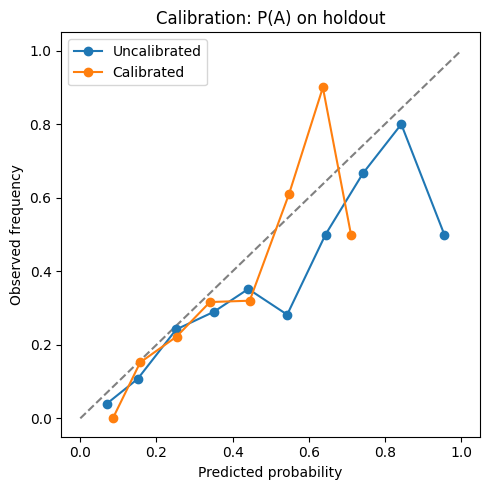

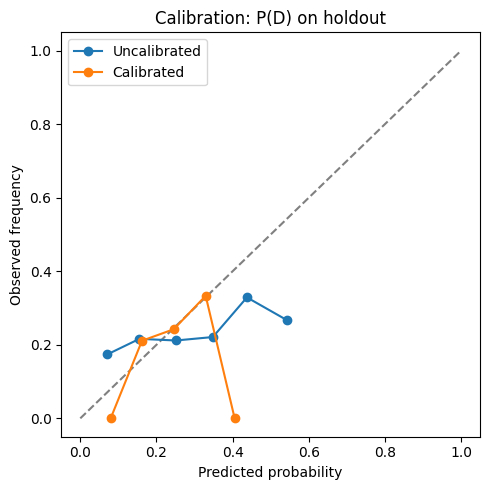

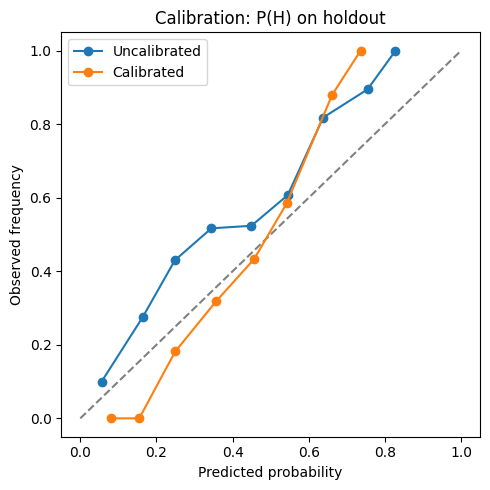

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import log_loss
from sklearn.model_selection import TimeSeriesSplit

# Uncalibrated baseline already fit above as `pipe` on aX, ay
# Evaluate uncalibrated on holdout
probs_uncal = pipe.predict_proba(bX)
ll_uncal = log_loss(by, probs_uncal)

# Multiclass Brier and Skill Score vs majority baseline
classes = pipe.named_steps['clf'].classes_
Y_true = pd.get_dummies(by).reindex(columns=classes, fill_value=0).values
brier_uncal = np.mean(np.sum((probs_uncal - Y_true)**2, axis=1))

majority = ay.value_counts().idxmax()
probs_major = np.tile((classes == majority).astype(float), (len(by), 1))
ll_maj = log_loss(by, probs_major)
brier_maj = np.mean(np.sum((probs_major - Y_true)**2, axis=1))

bss_uncal = 1 - brier_uncal / brier_maj
print(f"Uncalibrated | logloss={ll_uncal:.4f} | brier={brier_uncal:.4f} | BSS={bss_uncal:.4f}")

# Calibrated with time-aware folds (isotonic)
cal = CalibratedClassifierCV(estimator=pipe, method='isotonic', cv=TimeSeriesSplit(n_splits=5))
cal.fit(aX, ay)
probs_cal = cal.predict_proba(bX)
ll_cal = log_loss(by, probs_cal)
brier_cal = np.mean(np.sum((probs_cal - Y_true)**2, axis=1))
bss_cal = 1 - brier_cal / brier_maj
print(f"Calibrated   | logloss={ll_cal:.4f} | brier={brier_cal:.4f} | BSS={bss_cal:.4f}")

# Per-class calibration curves on holdout
for cls in classes:
    y_true_bin = (by == cls).astype(int)
    p_unc = probs_uncal[:, np.where(classes == cls)[0][0]]
    p_cal = probs_cal[:, np.where(classes == cls)[0][0]]

    prob_true_u, prob_pred_u = calibration_curve(y_true_bin, p_unc, n_bins=10, strategy='uniform')
    prob_true_c, prob_pred_c = calibration_curve(y_true_bin, p_cal, n_bins=10, strategy='uniform')

    plt.figure(figsize=(5,5))
    plt.plot([0,1],[0,1], '--', color='gray')
    plt.plot(prob_pred_u, prob_true_u, marker='o', label='Uncalibrated')
    plt.plot(prob_pred_c, prob_true_c, marker='o', label='Calibrated')
    plt.title(f"Calibration: P({cls}) on holdout")
    plt.xlabel('Predicted probability')
    plt.ylabel('Observed frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()
